# MultiClass-Logistic Regression

# How to handle multiclass
classification problems:

# .Split the task into multiple binary classification datasets

# .Fit a binary classification model on each

Importing Libraries

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression



Loading datasets

In [6]:
df=pd.read_csv("modifiedDigits4Classes.csv")

In [7]:
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,1,9,15,11,0,0,0,0,...,0,0,0,1,10,13,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0,0,6,12,12,6,0,0,0,0,...,0,0,0,2,11,10,4,0,0,1
716,0,3,14,15,6,0,0,0,0,7,...,0,0,4,15,13,12,11,1,0,2
717,0,1,10,13,2,0,0,0,0,10,...,0,0,0,9,13,11,10,9,0,2
718,0,0,15,13,1,0,0,0,0,0,...,0,0,0,10,13,10,6,2,0,2


In [8]:
df.shape

(720, 65)

In [10]:
df.label.value_counts()

3    183
1    182
0    178
2    177
Name: label, dtype: int64

visualize each digit

In [11]:
pixel_clonames=df.columns[:-1]

In [13]:
pixel_clonames

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63'],
      dtype='object')

In [14]:
image_values=df.loc[0,pixel_clonames].values

In [15]:
image_values

array([ 0,  0,  5, 13,  9,  1,  0,  0,  0,  0, 13, 15, 10, 15,  5,  0,  0,
        3, 15,  2,  0, 11,  8,  0,  0,  4, 12,  0,  0,  8,  8,  0,  0,  5,
        8,  0,  0,  9,  8,  0,  0,  4, 11,  0,  1, 12,  7,  0,  0,  2, 14,
        5, 10, 12,  0,  0,  0,  0,  6, 13, 10,  0,  0,  0], dtype=int64)

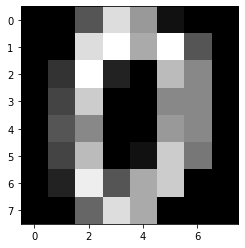

In [16]:
plt.imshow(image_values.reshape(8,8),cmap='gray')


In [23]:
img=np.array(df.iloc[4,:-1]).reshape(8,8)

In [27]:
img

array([[ 0,  0,  1,  9, 15, 11,  0,  0],
       [ 0,  0, 11, 16,  8, 14,  6,  0],
       [ 0,  2, 16, 10,  0,  9,  9,  0],
       [ 0,  1, 16,  4,  0,  8,  8,  0],
       [ 0,  4, 16,  4,  0,  8,  8,  0],
       [ 0,  1, 16,  5,  1, 11,  3,  0],
       [ 0,  0, 12, 12, 10, 10,  0,  0],
       [ 0,  0,  1, 10, 13,  3,  0,  0]], dtype=int64)

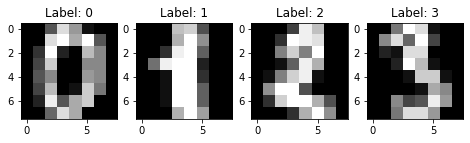

In [26]:
plt.figure(figsize=(10,2))
for index in range(0, 4):

    plt.subplot(1, 5, 1 + index )
    image_values = df.loc[index, pixel_clonames].values
    image_label = df.loc[index, 'label']
    plt.imshow(image_values.reshape(8,8), cmap ='gray')
    plt.title('Label: ' + str(image_label))


# # .Split the task into randomly multiple binary classification datasets

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(df[pixel_clonames],df['label'],random_state=0)

In [29]:
df[pixel_clonames]

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,0,6,13,10,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,0,11,16,10,0,0
2,0,0,0,4,15,12,0,0,0,0,...,5,0,0,0,0,3,11,16,9,0
3,0,0,7,15,13,1,0,0,0,8,...,9,0,0,0,7,13,13,9,0,0
4,0,0,1,9,15,11,0,0,0,0,...,0,0,0,0,1,10,13,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0,0,6,12,12,6,0,0,0,0,...,0,0,0,0,2,11,10,4,0,0
716,0,3,14,15,6,0,0,0,0,7,...,6,0,0,4,15,13,12,11,1,0
717,0,1,10,13,2,0,0,0,0,10,...,13,0,0,0,9,13,11,10,9,0
718,0,0,15,13,1,0,0,0,0,0,...,14,0,0,0,10,13,10,6,2,0


In [30]:
df['label']

0      0
1      1
2      2
3      3
4      0
      ..
715    1
716    2
717    2
718    2
719    0
Name: label, Length: 720, dtype: int64

In [31]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
109,0,0,0,0,14,4,0,0,0,0,...,0,0,0,0,0,0,14,10,0,0
700,0,2,11,16,13,2,0,0,0,11,...,11,0,0,2,13,12,9,0,0,0
101,0,2,15,15,5,0,0,0,0,5,...,5,0,0,2,14,16,13,9,1,0
499,0,3,12,15,16,16,3,0,0,6,...,0,0,0,3,16,16,15,6,0,0
319,0,3,15,14,5,0,0,0,0,14,...,15,0,0,3,16,16,16,15,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0,0,10,15,15,11,4,0,0,1,...,3,0,0,0,6,11,16,8,0,0
192,0,0,0,5,16,9,0,0,0,0,...,0,0,0,0,0,5,14,9,0,0
629,0,0,2,12,10,0,0,0,0,0,...,16,4,0,0,4,15,0,0,5,4
559,0,0,2,16,12,0,0,0,0,0,...,0,0,0,0,2,15,13,0,0,0


In [32]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
503,0,0,4,12,13,2,0,0,0,0,...,0,0,0,0,6,16,13,0,0,0
645,0,2,11,14,14,9,0,0,0,3,...,0,0,0,1,15,13,1,0,0,0
245,0,0,1,7,12,3,0,0,0,4,...,14,5,0,0,1,9,15,16,16,8
142,0,0,0,0,10,11,0,0,0,0,...,0,0,0,0,0,0,10,13,7,0
493,0,0,7,5,14,13,0,0,0,0,...,0,0,0,0,6,15,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,0,0,0,1,15,12,0,0,0,0,...,0,0,0,0,0,2,15,13,0,0
306,0,0,2,10,15,1,0,0,0,3,...,4,0,0,0,0,10,16,6,0,0
77,0,4,12,13,13,6,0,0,0,6,...,8,0,0,2,13,16,12,6,0,0
664,0,0,0,12,10,0,0,0,0,0,...,0,0,0,0,0,11,14,0,0,0


In [34]:
Y_test

503    1
645    3
245    3
142    1
493    0
      ..
538    1
306    0
77     3
664    1
258    2
Name: label, Length: 180, dtype: int64

In [35]:
Y_train

109    1
700    2
101    2
499    3
319    2
      ..
707    3
192    1
629    2
559    1
684    1
Name: label, Length: 540, dtype: int64

Standardize the Data

In [37]:
scaler=StandardScaler()

#fit on training set only
scaler.fit(X_train)

#apply transform to both the training set and the test set
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [42]:
#multi_class is specifying one versus rest
clf=LogisticRegression(solver='liblinear',
                      multi_class='ovr',
                      random_state=0)

clf.fit(X_train,Y_train) #model training
print('Training accuracy:', clf.score(X_train,Y_train))
print('Test accuracy:', clf.score(X_test,Y_test))

Training accuracy: 1.0
Test accuracy: 1.0


In [40]:
clf.intercept_

array([-2.712674  , -3.54379096, -3.18367757, -2.623974  ])

In [43]:
clf.coef_

array([[ 0.        ,  0.02391936, -0.08866296,  0.05368277, -0.26345568,
        -0.58430589, -0.32199705,  0.08184312,  0.09736176,  0.14744751,
        -0.03139333,  0.01820368,  0.02650798,  0.08169039,  0.01509716,
         0.06370278, -0.06804714,  0.14382149,  0.43630318, -0.4274243 ,
        -0.69891165,  0.44016417,  0.16025223,  0.        , -0.11970674,
         0.31468803,  0.63899474, -0.32703437, -0.69503781, -0.09193855,
         0.78405487,  0.        ,  0.        ,  0.53605883,  0.57597712,
        -0.25158621, -0.28670402, -0.3326827 ,  0.46376262,  0.        ,
         0.        ,  0.1210196 ,  0.2555909 , -0.37583049, -0.04467375,
         0.2973568 ,  0.24322977,  0.04123506, -0.00532695, -0.05254979,
         0.25224944,  0.00153879,  0.12473185,  0.19349086, -0.40180074,
        -0.19884384, -0.00532695, -0.01495694, -0.21241369,  0.16484338,
         0.19998964, -0.28363492, -0.3490597 , -0.21443362],
       [ 0.        , -0.13097934,  0.02423768, -0.29869486, -0.

In [45]:
clf.coef_.shape

(4, 64)

PREDICTIONS

In [47]:
X_test[0:1]

array([[ 0.        , -0.44164163, -0.48435536, -0.16016679,  0.35108785,
        -0.55471117, -0.31547218, -0.04307305, -0.05783149, -0.72929175,
        -1.05488912,  1.02618271,  0.88651785, -0.74766265, -0.44857709,
        -0.05783149, -0.05783149, -0.79267441, -0.52839697,  1.46948334,
         0.96624907, -0.44788243, -0.56778302,  0.        , -0.04307305,
        -0.68535877,  0.42712624,  1.28981307,  0.73534385, -1.22879599,
        -0.58206428,  0.        ,  0.        , -0.61682202,  0.82232911,
         1.42982773,  0.77002083, -1.21168884, -0.70262581,  0.        ,
         0.        , -0.56697193,  0.90819483,  1.51047174,  0.82995406,
        -1.33207101, -0.81521575, -0.06097108, -0.04307305, -0.43184184,
        -0.70511876,  1.12032879, -0.00959302, -2.20837098, -0.95305088,
        -0.25174275, -0.04307305, -0.36689602, -0.12329242,  0.72798535,
        -0.1270266 , -1.61952591, -0.61146785, -0.29725387]])

In [46]:
#The second class is the highest score so it will be the prediction for this data
clf.predict_proba(X_test[0:1])

array([[0.00183123, 0.98368966, 0.00536378, 0.00911533]])

In [48]:
clf.predict(X_test[0:1])

array([1], dtype=int64)

In [49]:
Y_test[0:1]

503    1
Name: label, dtype: int64

In [53]:
X_train[0:1]

array([[ 0.        , -0.44164163, -1.31139693, -2.99590664,  0.5770562 ,
        -0.16135066, -0.31547218, -0.04307305, -0.05783149, -0.72929175,
        -1.97041487, -2.13754264,  0.88651785,  0.28447497, -0.44857709,
        -0.05783149, -0.05783149, -0.79267441, -1.35930659,  0.48801024,
         0.96624907,  0.08562458, -0.56778302,  0.        , -0.04307305,
        -0.68535877, -1.02146659,  0.82068483,  0.88713502,  0.15524717,
        -0.58206428,  0.        ,  0.        , -0.61682202,  1.16642652,
         1.42982773,  1.08230866, -0.52546758, -0.70262581,  0.        ,
         0.        , -0.10025723,  1.06619264,  0.90177417,  1.45809028,
        -0.49253046, -0.81521575, -0.06097108, -0.04307305, -0.43184184,
        -1.59475457, -1.21474054,  1.06962126, -0.44021893, -0.95305088,
        -0.25174275, -0.04307305, -0.36689602, -1.27782257, -3.00040437,
         0.20434713,  0.26893013, -0.61146785, -0.29725387]])

In [54]:
clf.score(X_test,Y_test)

1.0

In [56]:
clf.score(X_test,Y_test)

1.0

# confusion materics

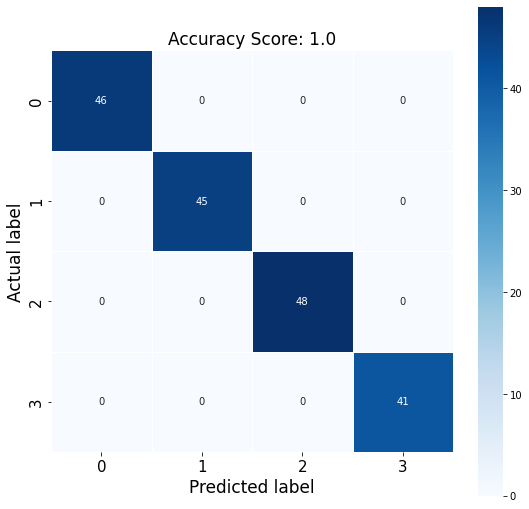

In [59]:
from sklearn import metrics
import seaborn as sns
score=clf.score(X_test,Y_test)
cm = metrics.confusion_matrix(Y_test, clf.predict(X_test))

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score), size = 17);
plt.tick_params(labelsize= 15)


In [60]:
cm

array([[46,  0,  0,  0],
       [ 0, 45,  0,  0],
       [ 0,  0, 48,  0],
       [ 0,  0,  0, 41]], dtype=int64)

<AxesSubplot:>

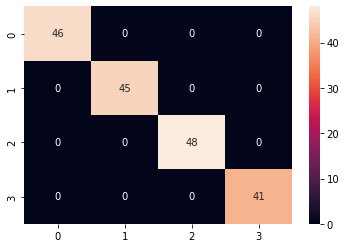

In [61]:
sns.heatmap(cm,annot=True)

In [62]:
from sklearn.metrics import precision_recall_fscore_support

In [63]:
precision_recall_fscore_support(Y_test, clf.predict(X_test))

(array([1., 1., 1., 1.]),
 array([1., 1., 1., 1.]),
 array([1., 1., 1., 1.]),
 array([46, 45, 48, 41], dtype=int64))